In [26]:
from engine import Value, draw_graph
import random

class Neuron:
    #nin: number of inputs a neuron should expect
    def __init__(self, nin:int=1):
        self.weights = [Value(data=random.uniform(-1,1), label='weight') for _ in range(nin)]
        self.bias = Value(data=random.uniform(-1,1), label='bias')

    def __call__(self, vals):
        act = sum((weight*val for weight, val in zip(self.weights, vals)), self.bias)
        out = act.tan()
        return out

    def parameters(self):
        return self.weights + [self.bias]

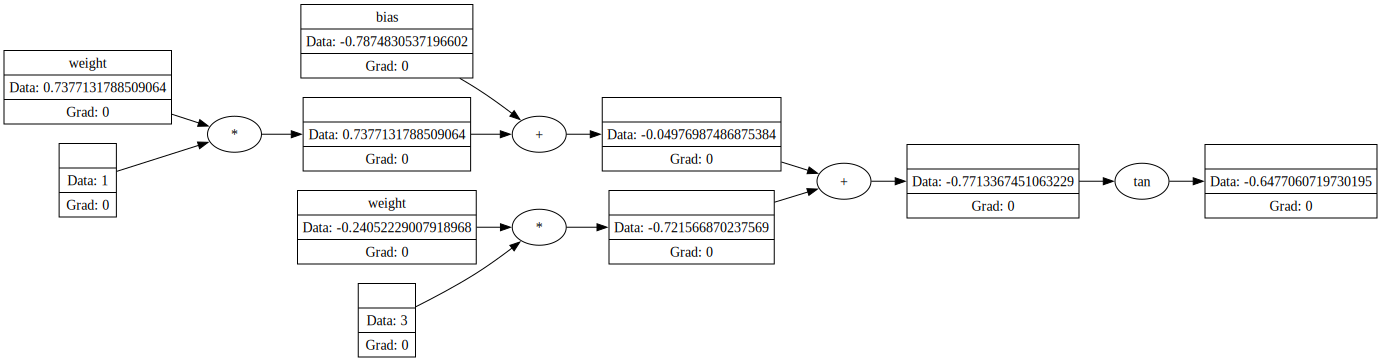

In [27]:
# Initialize neuron with 2 inputs and 1 output
n = Neuron(2)
# feed neuron some data
input = [1,3]
output = n(input)
# draw how neuron would look like
draw_graph(output)

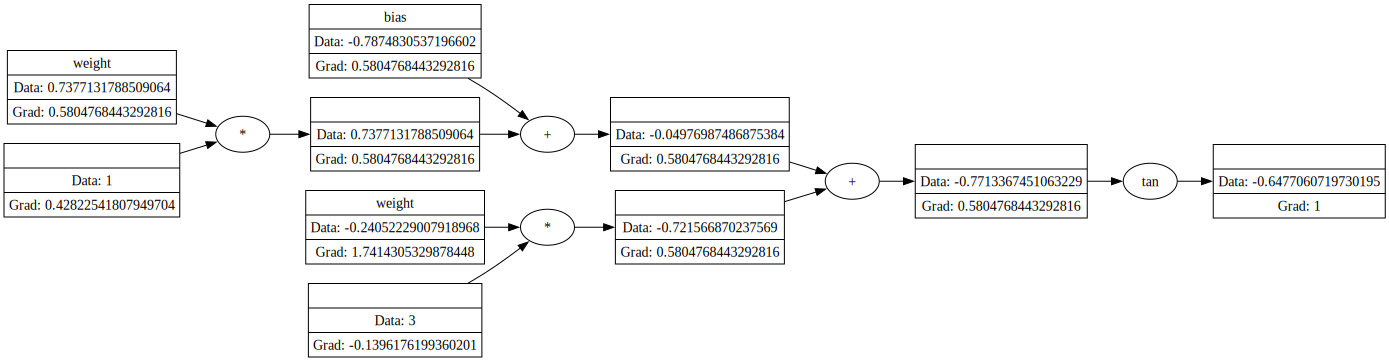

In [28]:
# backpropogate the neuron to calculate gradient decent of weights and bias
output.backward()
# draw the neuron
draw_graph(output)

In [29]:
n.parameters()

[Value(0.7377131788509064, weight),
 Value(-0.24052229007918968, weight),
 Value(-0.7874830537196602, bias)]

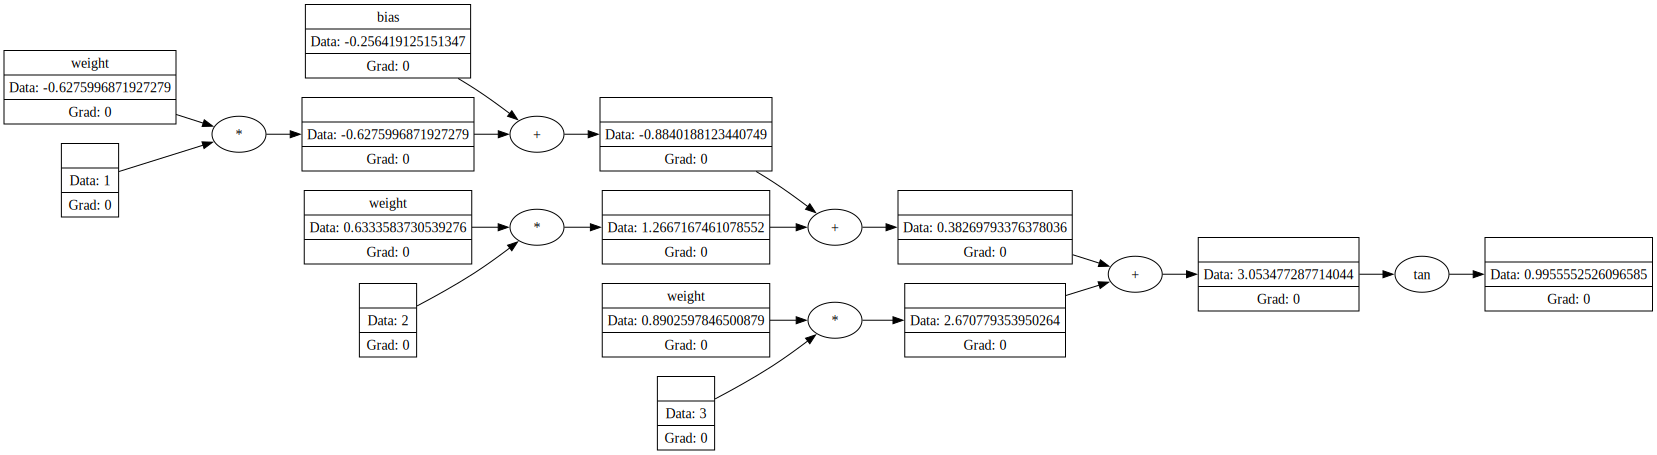

In [30]:
class Layer:
    #nin: number of inputs a layer should handle
    #nout: number of outputs given by layer or number of neurons
    def __init__(self, nin: int, nout: int):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x: list[float]) -> list[Value]:
        outs = [neuron(x) for neuron in self.neurons]
        return outs[0] if len(outs)==1 else outs

layer = Layer(3,1)
out_layer = layer([1,2,3])
draw_graph(out_layer)

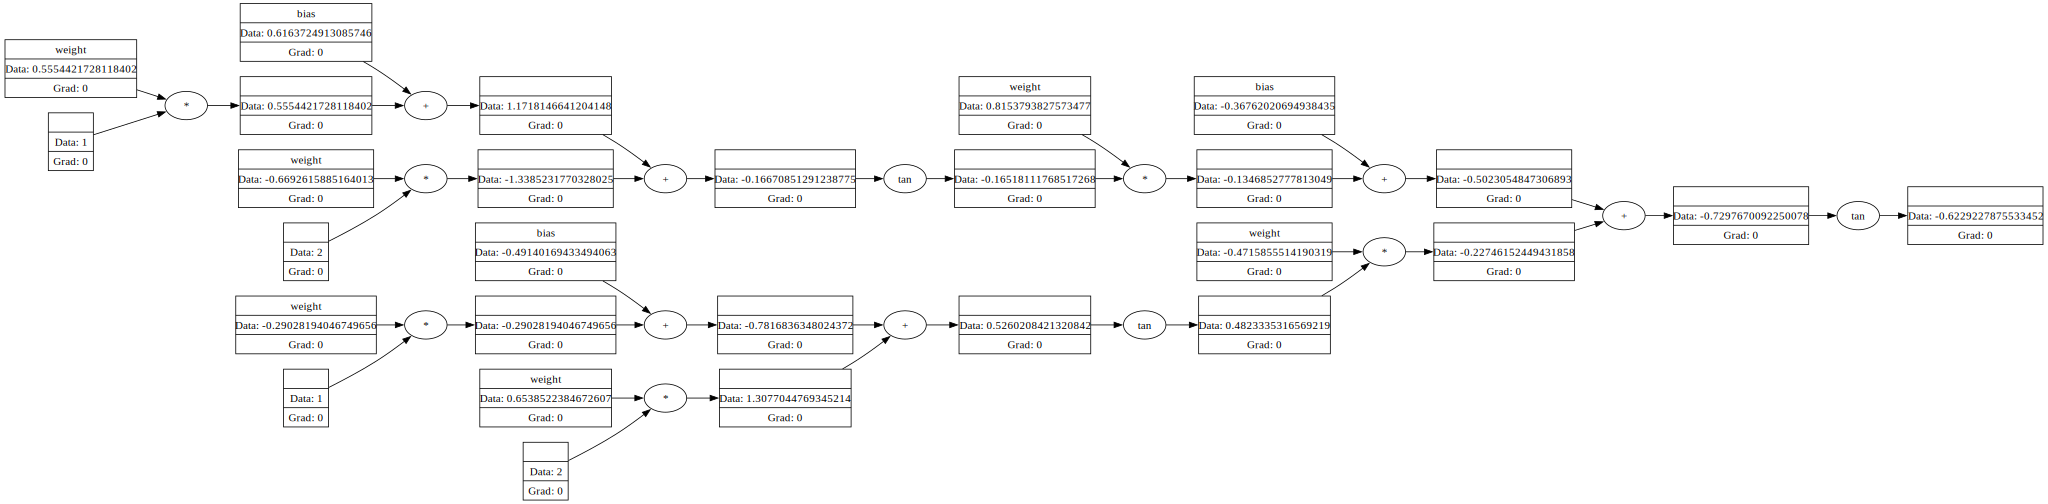

In [32]:
class MLP:
    # nin: number of inputs expected for MLP
    # nouts: list of counts of neurons each layer going to have
    def __init__(self, nin: int, nouts: list[int]):
        sn = [nin] + nouts
        self.layers = [Layer(sn[i], sn[i+1]) for i in range(len(nouts))]

    def __call__(self, x: list[float]) -> list[Value]:
        for layer in self.layers:
            x = layer(x)
        return x

mlp = MLP(2, [2,1])
out_mlp = mlp([1,2])
draw_graph(out_mlp)